In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
data= pd.read_csv("Bengaluru_House_Data.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
#Removing NA Values

df =data.drop(['society', 'availability', 'area_type','society'], axis= 'columns')
na_value=df.dropna()
total_na_value =na_value.isna().sum()
total_na_value

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [7]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df['BHK'] = df['size'].apply( lambda x : float(str(x).split(' ')[0]))
df3=df.dropna()
df3

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3.0
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4.0


In [9]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2.0
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2.0
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3.0
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2.0
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2.0


In [12]:
def sqft(x):
    n= x.split('-')
    if len(n)==2:
        return (float(n[0])+float(n[1]))/2
    try:
        return float(x)
    except:
        return None
        
        

In [13]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(sqft)
df4

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3.0
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4.0


In [14]:
#Dimensonality Reduction

df5=df4.copy()
df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']
df6=df5.drop([ 'size'], axis ='columns')
df6

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [15]:
df6['location']= df6['location'].apply(lambda x: x.strip())
location_stat= df6.groupby('location')['location'].agg('count')
location_stat

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1254, dtype: int64

In [16]:
location_less_than_10= location_stat[location_stat <10]
location_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1007, dtype: int64

In [17]:
df6['location']=df6['location'].apply(lambda x :'other' if x in location_less_than_10 else x )
len(df6.location.unique())

248

In [18]:
df7 =df6[~(df6.total_sqft/df6.BHK<300)]
df7

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [19]:
df7.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [20]:
#Removing Outlier

def remove_outlier(df):
    newdf= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        std= np.std(subdf.price_per_sqft)
        data= subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        newdf= pd.concat([newdf, data], ignore_index =True)
    return newdf
df8= remove_outlier(df7)
df9= df8.copy()
df9.shape

(9829, 7)

In [21]:
df10= df9[df9.bath<df9.BHK+2]
df10

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...,...
9824,other,1256.0,2.0,1.0,65.00,2.0,5175.159236
9825,other,1353.0,2.0,2.0,110.00,2.0,8130.081301
9826,other,812.0,1.0,0.0,26.00,1.0,3201.970443
9827,other,1440.0,2.0,2.0,63.93,3.0,4439.583333


In [22]:
#Hot encoding

dummies = pd.get_dummies(df10['location'])
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df11= pd.concat([df10, dummies.drop('other', axis= 'columns')], axis= 'columns')
df11

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4.0,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3.0,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3.0,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3.0,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2.0,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,other,1256.0,2.0,1.0,65.00,2.0,5175.159236,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9825,other,1353.0,2.0,2.0,110.00,2.0,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9826,other,812.0,1.0,0.0,26.00,1.0,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9827,other,1440.0,2.0,2.0,63.93,3.0,4439.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df12= df11.drop(['location','price_per_sqft'], axis='columns')
df12

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.00,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.00,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.00,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.00,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.00,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,1256.0,2.0,1.0,65.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9825,1353.0,2.0,2.0,110.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9826,812.0,1.0,0.0,26.00,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9827,1440.0,2.0,2.0,63.93,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x= df12.drop('price', axis = 'columns')
x.shape

(9748, 251)

In [26]:
y = df11['price']
y.shape

(9748,)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [28]:
#Best Model Selection

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model_params = {
    
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha':[1, 3, 5],
            'selection':['random', 'cyclic']
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [1, 2, 3]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            
        }
    }     
}

In [36]:
from sklearn.model_selection import GridSearchCV

scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train )
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df13 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df13

,model,best_score,best_params
0,linear_regression,0.782268,{'normalize': False}
1,Lasso,0.639571,"{'alpha': 1, 'selection': 'random'}"
2,Ridge,0.780224,{'alpha': 1}
3,decision_tree,0.576007,"{'criterion': 'mse', 'splitter': 'best'}"


In [33]:
#Training and Fitting Model

lr = LinearRegression(normalize = False)
f= lr.fit(x, y) 

In [37]:
#Taking Input values For Prediction  
    
def prediction(location, total_square_feet, bathroom, balcony, BHK):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = total_square_feet
    X[1] = bathroom
    X[2] = balcony
    X[3] = BHK
    if loc_index >= 0:
        X[loc_index] = 1

    return f.predict([X])[0]
        
location = str(input("Enter the location: "))
total_square_feet = float(input("Enter the total square feet: "))
bathroom = float(input("Enter the no of bathroom: "))
balcony = float(input("Enter the no of balcony: "))
BHK = float(input("Enter the no of BHK: "))

Enter the location: 1st Phase JP Nagar
Enter the total square feet: 1000
Enter the no of bathroom: 2
Enter the no of balcony: 2
Enter the no of BHK: 2


In [38]:
## Making Predictions

prediction(location, total_square_feet, bathroom, balcony, BHK)

90.065500032642

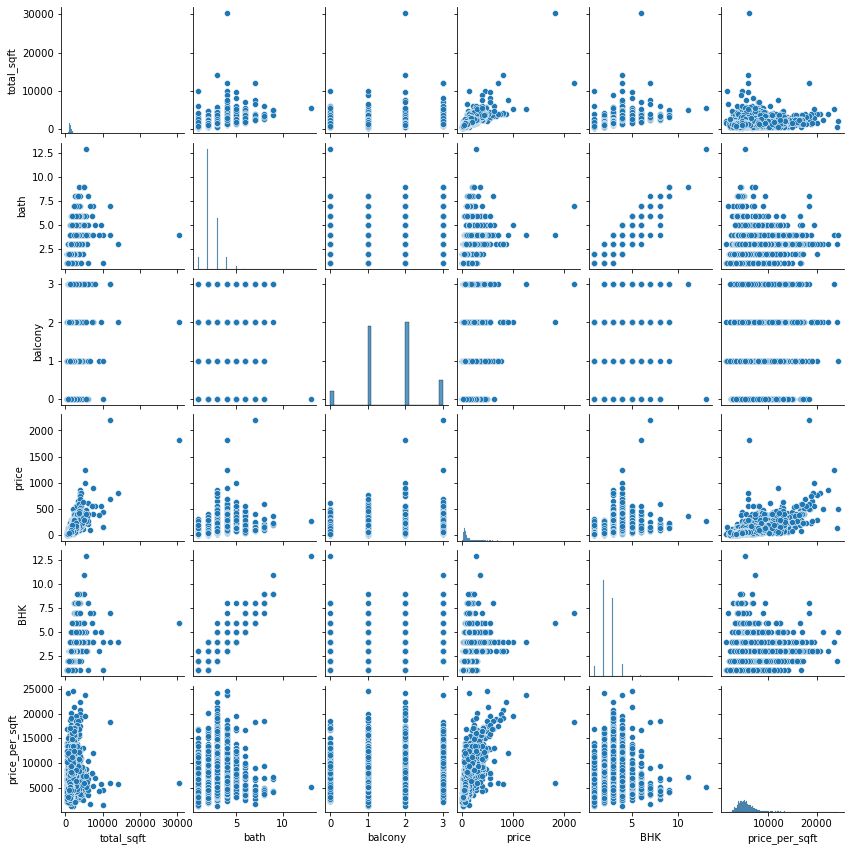

In [47]:
#Data Visualization

import seaborn as sn
sn.pairplot(df10, height=2)